In [33]:
##Dependencies
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import random as rd
np.random.seed(sum(map(ord, "aesthetics")))

##
## https://data.crunchbase.com/v3/reference - Crunchbase endpoint documenation
## 

## https://git-lfs.github.com/ GitHub Large file storage

In [34]:
## Read file and then sort 
## 
csv_file = "../Companies.csv"
companies_df = pd.read_csv(csv_file, encoding="iso-8859-1", 
                           parse_dates=["Founded Date","Closed Date","Last Funding Date"])
companies_df = companies_df.sort_values("Company Name").reset_index(drop=True)
print(len(companies_df.index))
companies_df.head(5)


8664


,Company Name,Company Name URL,Category Groups,Headquarters Location,Description,Crunchbase Rank,Founded Date,Closed Date,Number of Funding Rounds,Last Funding Date,Last Funding Amount,Last Funding Type,Total Funding Amount,Status
0,#waywire,https://www.crunchbase.com/organization/waywire,"Media and Entertainment, Government and Milita...","New York, New York, United States",#waywire is an online community focused on soc...,"21,987",2012-06-01,NaT,1,2012-06-30,"$1,750,000",Seed,"$1,750,000",Was Acquired
1,*gram Labs,https://www.crunchbase.com/organization/gram-labs,"Science and Engineering, Hardware, Data and An...","New York, New York, United States","GramLabs is a start up, leveraging deep learni...","11,897",2015-08-01,NaT,1,2016-07-27,"$1,000,000",Seed,"$1,000,000",Operating
2,.io,https://www.crunchbase.com/organization/io-rea...,Data and Analytics,"Alexandria, Virginia, United States",.io is a real-time intelligence platform.,"16,844",2015-03-01,NaT,1,2015-10-01,"$1,500,000",Seed,"$1,500,000",Operating
3,/dev/color,https://www.crunchbase.com/organization/dev-color,NaN,"Menlo Park, California, United States",/dev/color is a non-profit organization that a...,"35,003",2015-05-01,NaT,1,2016-08-23,"$120,000",Seed,"$120,000",Operating
4,10 By 10,https://www.crunchbase.com/organization/10-by-10,"Software, Professional Services","San Francisco, California, United States",10by10 builds a marketplace to more quickly ma...,"59,822",2015-01-01,NaT,1,2017-07-01,"$120,000",Seed,"$120,000",Operating


In [35]:
# convert this to a number and fill NaN with zeros
#crunch_df["Number of Funding Rounds"] = crunch_df["Number of Funding Rounds"].fillna(value= 0).astype(int)


# convert these to a float - fails due to unreadable characters
companies_df["Last Funding Amount"] = companies_df["Last Funding Amount"].str.strip() \
                                                   .replace('[\$,]','', regex=True ).astype(np.float64)

# convert these to a float
companies_df["Total Funding Amount"] = companies_df["Total Funding Amount"].str.strip() \
                                                    .replace('[\$,]','', regex=True ).astype(np.float64)
companies_df
#print(len(companies_df.index))


,Company Name,Company Name URL,Category Groups,Headquarters Location,Description,Crunchbase Rank,Founded Date,Closed Date,Number of Funding Rounds,Last Funding Date,Last Funding Amount,Last Funding Type,Total Funding Amount,Status
0,#waywire,https://www.crunchbase.com/organization/waywire,"Media and Entertainment, Government and Milita...","New York, New York, United States",#waywire is an online community focused on soc...,"21,987",2012-06-01,NaT,1,2012-06-30,1750000.0,Seed,1750000.0,Was Acquired
1,*gram Labs,https://www.crunchbase.com/organization/gram-labs,"Science and Engineering, Hardware, Data and An...","New York, New York, United States","GramLabs is a start up, leveraging deep learni...","11,897",2015-08-01,NaT,1,2016-07-27,1000000.0,Seed,1000000.0,Operating
2,.io,https://www.crunchbase.com/organization/io-rea...,Data and Analytics,"Alexandria, Virginia, United States",.io is a real-time intelligence platform.,"16,844",2015-03-01,NaT,1,2015-10-01,1500000.0,Seed,1500000.0,Operating
3,/dev/color,https://www.crunchbase.com/organization/dev-color,NaN,"Menlo Park, California, United States",/dev/color is a non-profit organization that a...,"35,003",2015-05-01,NaT,1,2016-08-23,120000.0,Seed,120000.0,Operating
4,10 By 10,https://www.crunchbase.com/organization/10-by-10,"Software, Professional Services","San Francisco, California, United States",10by10 builds a marketplace to more quickly ma...,"59,822",2015-01-01,NaT,1,2017-07-01,120000.0,Seed,120000.0,Operating
5,10-4 Systems,https://www.crunchbase.com/organization/10-4-s...,"Commerce and Shopping, Software, Transportatio...","Boulder, Colorado, United States",10-4 is redefining the future of transportatio...,"6,618",2012-01-01,NaT,1,2016-06-27,13900000.0,Series A,13900000.0,Operating
6,10X Genomics,https://www.crunchbase.com/organization/10x-ge...,"Biotechnology, Science and Engineering, Health...","Pleasanton, California, United States",10X Genomics provides an innovative genomics p...,"3,393",2012-01-01,NaT,3,2016-03-17,55000000.0,Series C,113000000.0,Operating
7,10sec,https://www.crunchbase.com/organization/10sec,"Commerce and Shopping, Mobile","San Francisco, California, United States",A place for Instagramers to buy and sell.,"24,952",2013-07-08,NaT,2,2014-05-08,1600000.0,Seed,1600000.0,Operating
8,12 Labs,https://www.crunchbase.com/organization/12-labs,Health Care,"Palo Alto, California, United States",Applause - Making Weight Loss Work,"26,599",2014-08-01,NaT,1,2014-11-26,935000.0,Seed,935000.0,Operating
9,121 Mobile,https://www.crunchbase.com/organization/121-mo...,Sales and Marketing,"Princeton, New Jersey, United States",An end-to-end cloud based digital marketing pl...,"27,952",2012-02-17,NaT,4,2015-12-18,2200000.0,Seed,4000000.0,Operating


In [36]:
## Read file and then sort 
## 
csv_file = "../Funding_Rounds.csv"
fundrds_df = pd.read_csv(csv_file, encoding="iso-8859-1", parse_dates=["Announced On Date"])
fundrds_df = fundrds_df.sort_values("Company Name").reset_index(drop=True)
print(len(fundrds_df.index))
fundrds_df.head(5)

10901


,Company Name,Company Name URL,Funding Type,Money Raised,Announced On Date
0,#waywire,https://www.crunchbase.com/organization/waywire,Seed,"$1,750,000",2012-06-30
1,*gram Labs,https://www.crunchbase.com/organization/gram-labs,Seed,"$1,000,000",2016-07-27
2,.io,https://www.crunchbase.com/organization/io-rea...,Seed,"$1,500,000",2015-10-01
3,/dev/color,https://www.crunchbase.com/organization/dev-color,Seed,"$120,000",2016-08-23
4,10 By 10,https://www.crunchbase.com/organization/10-by-10,Seed,"$120,000",2017-07-01


In [37]:
# convert these to a float
fundrds_df["Money Raised"] = fundrds_df["Money Raised"].replace('[\$,]','', regex=True ).astype(np.float64)


fundrds_df
#print(len(fundrds_df.index))

,Company Name,Company Name URL,Funding Type,Money Raised,Announced On Date
0,#waywire,https://www.crunchbase.com/organization/waywire,Seed,1750000.0,2012-06-30
1,*gram Labs,https://www.crunchbase.com/organization/gram-labs,Seed,1000000.0,2016-07-27
2,.io,https://www.crunchbase.com/organization/io-rea...,Seed,1500000.0,2015-10-01
3,/dev/color,https://www.crunchbase.com/organization/dev-color,Seed,120000.0,2016-08-23
4,10 By 10,https://www.crunchbase.com/organization/10-by-10,Seed,120000.0,2017-07-01
5,10-4 Systems,https://www.crunchbase.com/organization/10-4-s...,Series A,13900000.0,2016-06-27
6,10X Genomics,https://www.crunchbase.com/organization/10x-ge...,Series B,55000000.0,2015-01-12
7,10X Genomics,https://www.crunchbase.com/organization/10x-ge...,Series C,55000000.0,2016-03-17
8,10X Genomics,https://www.crunchbase.com/organization/10x-ge...,Series A,3000000.0,2012-10-08
9,10sec,https://www.crunchbase.com/organization/10sec,Seed,1600000.0,2014-05-08


In [38]:
## Read file and then sort 
##
csv_file = "../Org_Output.csv"
org_df = pd.read_csv(csv_file, encoding="iso-8859-1")
org_df = org_df.sort_values("Company Name").reset_index(drop=True)
print(len(org_df.index))
org_df.head(5)


497523


,Unnamed: 0,UUID,Company Name,Homepage
0,187767,8e2c2fbd-2244-32eb-8e35-9ea9cefeb90f,!K7,http://www.k7.com
1,324012,7268c6ad-9c37-3265-7545-0f4c07fe22a2,!SHOUTTAG,https://shouttag.com
2,369276,b8f77030-aab4-3914-a2ce-85302f459390,!hey software,http://www.heyinc.com/
3,134099,7ef2d009-800d-c9b6-0f15-5f52c1c6c3e1,!mpossible,http://www.impossiblevisions.com
4,362136,1bf2f0d9-b344-085d-2130-91a7746c1020,"""Believe & Succeed""",http://www.believe-succeed.com


In [39]:
# # Rename columns so they are easier to use
# crunch_df.rename(columns={"Company Name":"company_name",
#                           "Company Name URL":"url",
#                           "Category Groups":"cat_group",
#                           "Headquarters Location":"hq_location",
#                           "Description":"desc",
#                           "Crunchbase Rank":"crunch_rank",
#                           "Founded Date":"founded_date",
#                           "Closed Date":"closed_date",
#                           "Status":"status",
#                           "Number of Employees":"emp_count",
#                           "Number of Funding Rounds":"fund_rnd_cnt",
#                           "Last Funding Date":"last_fund_date",
#                           "Last Funding Amount":"last_fund_amt",
#                           "Last Funding Type":"last_fund_type",
#                           "Last Equity Funding Amount":"last_eqty_fund_amt",
#                           "Total Equity Funding Amount":"tot_eqty_fund_amt",
#                           "Total Funding Amount":"tot_fund_amt"},inplace=True)
# crunch_df.head(5)

In [40]:
# 127 records with Status == "Closed"
closed_df = companies_df.loc[companies_df["Status"] == "Closed"]
closed_df.head(5)
print(len(closed_df.index))

253


In [41]:
# 8360 records with Status == "Operating"
oper_df = companies_df.loc[companies_df["Status"] == "Operating"]
oper_df.head(5)
print(len(oper_df.index))

7922


In [42]:
funding_type = companies_df["Last Funding Type"].value_counts()
funding_type

Seed        6167
Series A    1638
Series B     649
Series C     168
Series D      42
Name: Last Funding Type, dtype: int64

https://www.similarweb.com/website/shotput.com#overview
Before the soup.prettify
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage no-websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients no-cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers applicationcache svg inlinesvg smil svgclippaths" lang="en">
 <head>
  <script async="" id="trdflame" src="https://prod.trendemon.com/apis/loadflame/mainflamejs?aid=1786&amp;uid=1805&amp;baseurl=https%3A%2F%2Fprod.trendemon.com%2F&amp;appid=208770359181748" type="text/javascript">
  </script>
  <script async="" src="https://widget.intercom.io/widget/e74067abd037cecbecb0662854f02aee12139f95" type="text/javascript">
  </script>
  <script async="" src="https://www.google-analytics.com/analytics.j
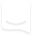
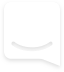
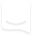
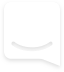
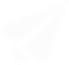
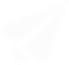

********  in soup for loop line second read is  ********
<div class="rankingItem-rank js-editable">
<span class="rankingItem-value js-countable" data-value="2,117,644">2,117,644</span><i class="rankingItem-valueIcon rankingItem-valueIcon--decreased icon-arrow-down-ranking rankingItem-valueIcon--is-shown"></i>
</div>
********  in soup for loop line second read is  ********
<div class="rankingItem-rank js-editable">
<span class="rankingItem-value js-countable" data-value="106,307">106,307</span><i class="rankingItem-valueIcon rankingItem-valueIcon--decreased icon-arrow-down-ranking rankingItem-valueIcon--is-shown"></i>
</div>
********  in soup for loop line second read is  ********
<span class="rankingItem-value js-countable" data-value="5,447,784">5,447,784</span>
********  in soup for loop line second read is  ********
<span class="rankingItem-value js-countable" data-value="2,117,644">2,117,644</span>
********  in soup for loop line second read is  ********
<span class="rankingItem-va

In [1]:
## Web scraping program
##  Test URL https://www.similarweb.com/website/shotput.com#overview 

## https://github.com/douglasmiranda/splinter-examples/blob/master/another_examples/screenshot.py
## http://splinter.readthedocs.io/en/latest/tutorial.html

from splinter import Browser
import csv
from bs4 import BeautifulSoup 
import time

# browser = Browser('chrome')
# browser = Browser('firefox')

with Browser() as browser:
    # Visit URL
    #url = "https://www.similarweb.com/website/" 
    #url_suffix = "#overview"
    
    # loop thru the urls in data frame
    counter = 0
    #for index, row in companies_df.iterrows():
    for i in range(0,1):
        counter += 1
        if counter == 2:
            break
        try:
            # temp url for testing
            t_url = "https://www.similarweb.com/website/shotput.com#overview"
            # Use url from data frame
            #url = row["Company Name URL"]
            print(t_url)
            browser.visit(t_url)
            time.sleep(30)
            html = browser.html
            soup = BeautifulSoup(html, "html.parser")
            
            print("Before the soup.prettify")
            
            print(soup.prettify())
            
            #span class="rankingItem-value js-countable"
            print("********  Start for loop to read soup  ********")
            #for line in soup.findAll('a', class_="rankingItem-subTitle is-link"):
            for line in soup.findAll('div', class_="rankingItem-underTitle"):
                # Append to a file or write to a data frame
                print("********  in soup for loop line first read is  ********")
                print(line)
                # Write to a file
                with open('mystats.csv', 'a') as csvfile:
                    csvwriter = csv.writer(csvfile, delimiter=',')
                    csvwriter.writerow(line)
            
            for line in soup.findAll('div', class_="rankingItem-rank js-editable"): 
            #for line in soup.findAll('span', class_="rankingItem-value js-countable"):
                # Append to a file or write to a data frame
                print("********  in soup for loop line second read is  ********")
                print(line)
                # Write to a file
                with open('mystats.csv', 'a') as csvfile:
                    csvwriter = csv.writer(csvfile, delimiter=',')
                    csvwriter.writerow(line)
            
            for line in soup.findAll('span', class_="rankingItem-value js-countable"):
                # Append to a file or write to a data frame
                print("********  in soup for loop line second read is  ********")
                print(line)
                # Write to a file
                with open('mystats.csv', 'a') as csvfile:
                    csvwriter = csv.writer(csvfile, delimiter=',')
                    csvwriter.writerow(line)
            
            line = soup.find('span', class_="engagementInfo-param engagementInfo-param--large u-text-ellipsis")
            # Write to a file
            with open('mystats.csv', 'a') as csvfile:
                csvwriter = csv.writer(csvfile, delimiter=',')
                csvwriter.writerow(line)
        
            # Grab a tag from the html 
            for line in soup.findAll('span', class_="engagementInfo-param u-text-ellipsis"):
            #for line in soup.findAll('span', class_="engagementInfo-valueNumber"):
                # Append to a file or write to a data frame
                print("********  in soup for loop line third read is  ********")
                # Write to a file
                with open('mystats.csv', 'a') as csvfile:
                    csvwriter = csv.writer(csvfile, delimiter=',')
                    csvwriter.writerow(line)
                    
              # Grab a tag from the html 
            for line in soup.findAll('span', class_="engagementInfo-valueNumber"):
                # Append to a file or write to a data frame
                print("********  in soup for loop line fourth read is  ********")
                print(line)
                # Write to a file
                with open('mystats.csv', 'a') as csvfile:
                    csvwriter = csv.writer(csvfile, delimiter=',')
                    csvwriter.writerow(line)       
        
#                     # Write to the the data frame                
#                     # Save the json info into variables
#                     html_tag  = user_account["tag_name"]
#                     html_text = user_account["tag_text"]
               
#                     # Set the data frame info 
#                     companies_df.set_value(index, "col1", html_tag)
#                     companies_df.set_value(index, "col2", html_text)
        except:
            print("Error with url: ", t_url)


